In [1]:
import cobra
import GEMS
import pandas as pd
import numpy as np
import os


import pickle
from etcpy import etc
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [2]:
data = GEMS.load_exp_data('../data/ExpGrowth.csv')
path = '../'
params = pd.read_csv(os.path.join(path,'data/model_enzyme_params.csv'),index_col=0)
df = etc.calculate_thermal_params(params)

dfae_batch = data[4].set_index('Ts').rename_axis(None)
dfae_batch

,r
9.2056,0.039240
10.9530,0.065160
12.4143,0.101160
13.4838,0.122760
14.8738,0.158400
15.9057,0.214200
17.0121,0.214560
18.1174,0.234360
19.2561,0.295920
20.2171,0.344880


In [10]:
def aerobic(params):
    params = etc.sample_data_uncertainty_with_constraint(params, ['Topt', 'dCpt'])
    # thermalParams: a dictionary with ids like uniprotid_Topt 
    df = etc.calculate_thermal_params(params)
    #mae = pickle.load(open(os.path.join(path,'models/aerobic.pkl'),'rb'))
    mae = cobra.io.load_matlab_model('../models/ecModel.mat')
    
    #mae = GEMS.addNGAMreaction(mae)
    mae.reactions.EX_glc__D_e.lower_bound = -100
    mae.reactions.BIOMASS_Ec_iJO1366_core_53p95M.upper_bound = 50
    
    try: 
        rae, gae, oae, model = etc.simulate_growth(mae,dfae_batch.index+273.15,df=df,sigma=0.5)
    except: 
        rae = np.zeros(dfae_batch.shape[0])
        model = None
    
    rae = [0 if x is None else x for x in rae]
    rae = [0 if x<1e-3 else x for x in rae]
    #print(rae)
    #rexp = GEMS.aerobic_exp_data()['data']
    
    #print('r2_batch:',r2_score(rexp,rae))
    #print('MSE_ae',MSE(rexp,rae))
    return {'growth':np.array(rae), 'glucose':np.array(gae), 'oxygen': np.array(oae)}

In [4]:
def simulate_with_sampling(OriParams):
    
    # Load the ecGEM
    mae = cobra.io.load_matlab_model('../models/ecModel.mat')
    mae.reactions.EX_glc__D_e.lower_bound = -100
    mae.reactions.BIOMASS_Ec_iJO1366_core_53p95M.upper_bound = 50
    
    
        
    try: 
        rae, gae, oae = etc.simulate_growth_with_resampling(mae,dfae_batch,oriParams=OriParams,sigma=0.5)
    except: 
        rae = np.zeros(dfae_batch.shape[0])

    rae = [0 if x is None else x for x in rae]
    rae = [0 if x<1e-3 else x for x in rae]
        
    print(rae)
    print(abs(rae - dfae_batch['r'].values))
    
    try: dictToReturn = {'growth':np.array(rae), 'glucose':np.array(gae), 'oxygen': np.array(oae)}
    except: dictToReturn = None
    return dictToReturn

In [5]:
rae = simulate_with_sampling(params)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-29
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.03924  0.06516  0.10116  0.12276  0.1584   0.2142   0.21456  0.23436
 0.29592  0.34488  0.377676 0.439236 0.519444 0.561024 0.632556 0.682704
 0.715644 0.782892 0.828756 0.884556 0.937656 1.00062  1.032264 0.926676
 0.27648 ]


In [6]:
rae

TypeError: 'NoneType' object is not subscriptable

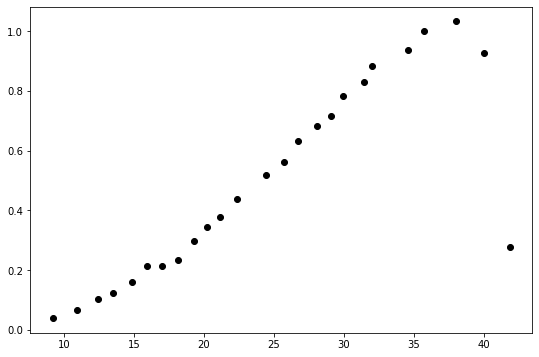

In [7]:
plt.figure(figsize=(9, 6))
plt.scatter(dfae_batch.index,dfae_batch['r'].values,label='Experimental Growth',color='k')
plt.plot(dfae_batch.index,rae['growth'],markersize=5,marker='o',label='Pred Growth')
#plt.plot(dfae_batch.index,rae['glucose'],markersize=5,marker='o',label='Glucose')
#plt.plot(dfae_batch.index,rae['oxygen'],markersize=5,marker='o',label='Oxygen')
plt.xlabel('Temperature ($^\circ$C)')
#plt.ylabel('Specific growth rate (h$^{-1}$)')
plt.ylabel('Aerobic $r_{max}$ (h$^{-1}$)')

plt.legend(fontsize=9,loc='upper left')
plt.tight_layout()
#plt.savefig('../results/presentation22.png')
plt.show()

In [8]:
mae = cobra.io.load_matlab_model('../models/ecModel.mat')
mae.reactions.EX_glc__D_e.lower_bound = -100
mae.reactions.BIOMASS_Ec_iJO1366_core_53p95M.upper_bound = 50

In [9]:
rae, gae, oae = etc.simulate_growth_with_resampling(mae,dfae_batch,oriParams=params,sigma=0.5)

NGAM is: 3.23


/home/aditi/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [ ]:
etc.sample_data_uncertainty_with_constraint(params, ['Topt', 'dCpt'])

In [11]:
rae = aerobic(params)

NGAM is: 3.23
Growth at  9.205600000000004 is:  4.1069279039817215e-10
NGAM is: 3.23
Growth at  10.953000000000031 is:  1.0756937310348469e-09
NGAM is: 3.23
Growth at  12.414300000000026 is:  3.127697009469453e-09
NGAM is: 3.23
Growth at  13.48380000000003 is:  1.2386578674024333e-08
NGAM is: 3.23
Growth at  14.873800000000017 is:  3.5197677759459364e-08
NGAM is: 3.23
Growth at  15.905700000000024 is:  7.537168648639564e-08
NGAM is: 3.23
Growth at  17.012100000000032 is:  7.86449816542878e-08
NGAM is: 3.23
Growth at  18.117400000000032 is:  1.657992152202711e-07
NGAM is: 3.23
Growth at  19.256100000000004 is:  3.5338899911028304e-07
NGAM is: 3.23
Growth at  20.217100000000016 is:  6.633033017903187e-07
NGAM is: 3.23
Growth at  21.14330000000001 is:  1.2075721642538385e-06
NGAM is: 3.23
Growth at  22.353400000000022 is:  2.6119742479714773e-06
NGAM is: 3.23
Growth at  24.41900000000004 is:  9.468431617532891e-06
NGAM is: 3.477026378713294
Growth at  25.737300000000005 is:  2.11381718818

UnboundLocalError: local variable 'gae' referenced before assignment